<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Another_copy_of_comment_toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Deep Learning for Comment Toxicity Detection with Streamlit





##### **Project Type**    - Classification/Supervised
##### **Contribution**    - Individual


# **Project Summary -**

Online communities and social media platforms play a central role in modern communication, enabling people to share ideas and engage in discussions across diverse topics. However, the rise of toxic comments—such as harassment, hate speech, and offensive language—creates serious challenges in fostering safe and constructive interactions. To tackle this issue, there is a growing need for automated systems that can detect and flag toxic content in real time.

The goal of this project is to build a deep learning–based toxicity detection model using Python. The model will process user comments and predict the likelihood of toxicity, helping moderators and administrators take timely action. By accurately identifying harmful content, the system will support healthier online environments by enabling interventions such as filtering, issuing warnings, or restricting toxic behavior.

# **GitHub Link -**

# **Problem Statement**


 Online communities and social media platforms are vital for modern communication, enabling people to interact and exchange ideas on diverse topics. However, the rise of toxic comments—such as harassment, hate speech, and offensive language—threatens healthy and constructive discourse. To address this challenge, there is a need for automated systems that can detect and flag toxic content in real time. This project aims to develop a deep learning–based toxicity detection model using Python to analyze user comments and predict the likelihood of toxicity. The model will support moderators by accurately identifying harmful content, enabling actions like filtering, issuing warnings, or initiating further review.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# Comment toxicity detection

###Uploading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import nltk
#nltk.download("stopwords")
#nltk.download("wordnet")
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
train_df.shape

(159571, 8)

In [4]:
test_df = pd.read_csv('test.csv')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
test_df.shape

(153164, 2)

# **1. Data Cleaning**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train_df.duplicated().sum()

np.int64(0)

In [10]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
train_df.dtypes

,0
id,object
comment_text,object
toxic,int64
severe_toxic,int64
obscene,int64
threat,int64
insult,int64
identity_hate,int64


In [12]:
train_df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [13]:
test_df.columns

Index(['id', 'comment_text'], dtype='object')

In [14]:
# target columns
labels = train_df[['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']]

In [15]:
labels.value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                143346
1      0             0        0       0       0                  5666
                     1        0       1       0                  3800
                                      0       0                  1758
                     0        0       1       0                  1215
       1             1        0       1       0                   989
       0             1        0       1       1                   618
0      0             1        0       0       0                   317
                     0        0       1       0                   301
1      1             1        0       1       1                   265
0      0             1        0       1       0                   181
1      1             1        0       0       0                   158
       0             0        0       0       1                   136
                                      1       1                   134
                     1        1       1       0                   131
                     0        1       0       0                   113
       1             1        1       1       0                    64
       0             1        1       1       1                    56
0      0             0        0       0       1                    54
1      1             0        0       0       0                    41
       0             1        0       0       1                    35
       1             1        1       1       1                    31
0      0             0        0       1       1                    28
                              1       0       0                    22
                     1        0       1       1                    18
1      0             0        1       1       0                    16
       1             0        0       1       0                    14
       0             1        1       0       0                    11
       1             0        1       0       0                    11
                              0       1       1                     7
       0             0        1       0       1                     7
       1             1        0       0       1                     6
                              1       0       0                     4
0      0             1        0       0       1                     3
                     0        1       1       0                     3
1      0             0        1       1       1                     3
       1             0        0       0       1                     3
0      0             1        1       1       0                     2
                                      0       0                     2
1      1             0        1       0       1                     1
                                      1       0                     1
Name: count, dtype: int64

In [16]:
labels.sum()

,0
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


/tmp/ipython-input-1335176888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


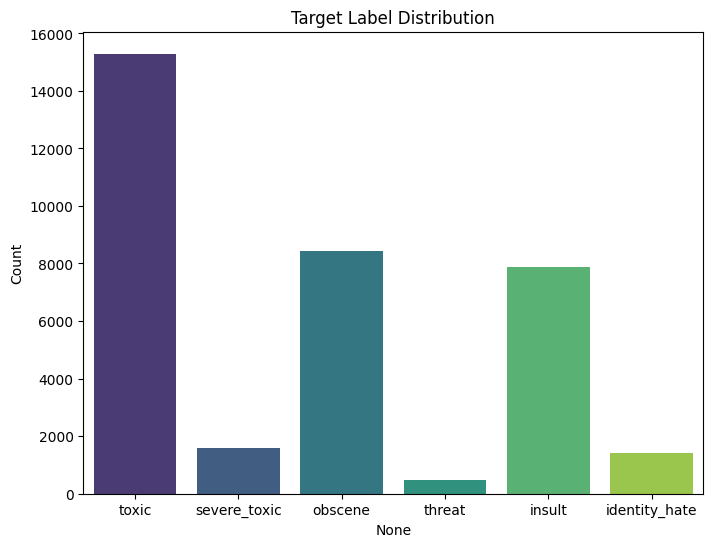

In [17]:
label_counts = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Target Label Distribution")
plt.ylabel("Count")
plt.show()

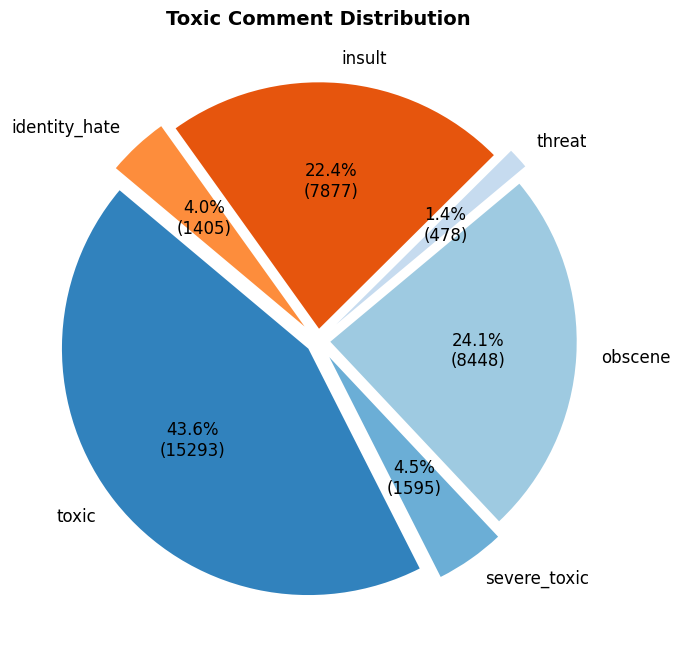

In [18]:
import matplotlib.pyplot as plt

# Data
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
#sizes = [15294, 1595, 8449, 478, 7877, 1405]
sizes = label_counts

# Better color palette
colors = plt.cm.tab20c.colors[:6]  # 6 distinct nice colors
explode = (0.05, 0.08, 0.05, 0.1, 0.05, 0.08)  # highlight slices a bit

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    sizes, labels=labels, colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sizes)/100)})',  # show % and count
    startangle=140, explode=explode, shadow=False,
    textprops={'fontsize': 12}
)

plt.title("Toxic Comment Distribution", fontsize=14, fontweight='bold')
plt.show()

/tmp/ipython-input-3174636874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number_of_labels', data=train_df, palette="rocket")


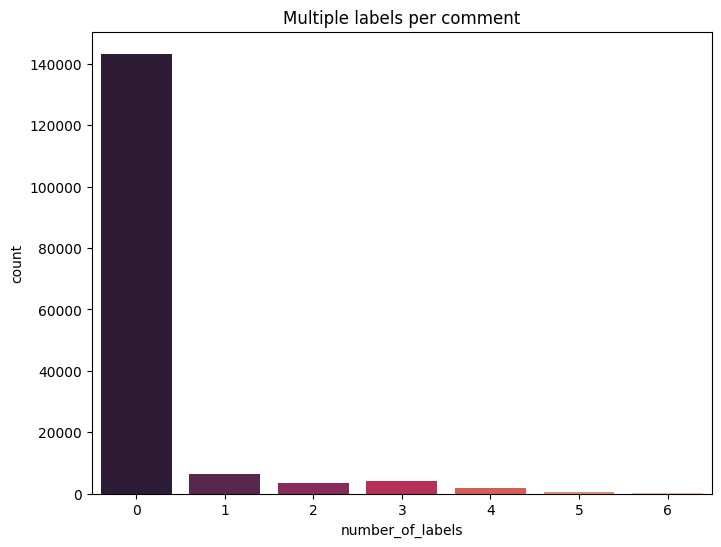

In [19]:
train_df['number_of_labels'] = train_df[labels].sum(axis=1)

# Plot distribution
plt.figure(figsize=(8,6))
sns.countplot(x='number_of_labels', data=train_df, palette="rocket")

plt.title("Multiple labels per comment")
plt.xlabel("number_of_labels")
plt.ylabel("count")
plt.show()

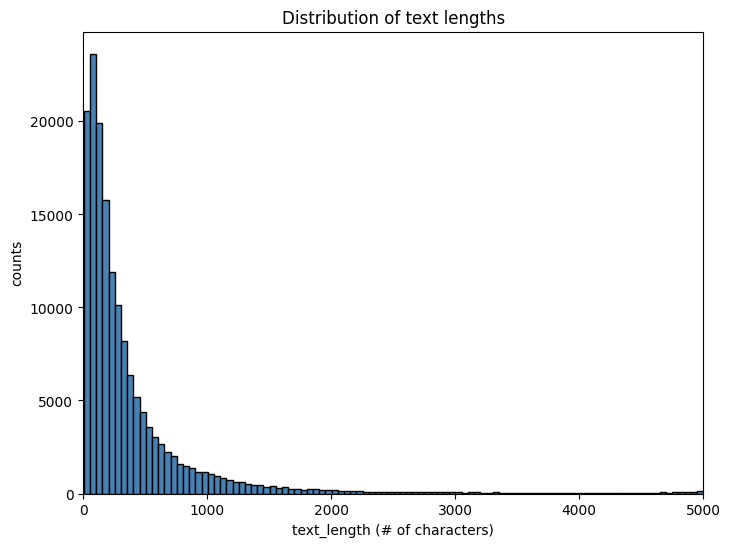

In [20]:
train_df['text_length'] = train_df['comment_text'].str.len()

# Plot histogram of text lengths
plt.figure(figsize=(8,6))
plt.hist(train_df['text_length'], bins=100, color='steelblue', edgecolor='black')

plt.title("Distribution of text lengths")
plt.xlabel("text_length (# of characters)")
plt.ylabel("counts")
plt.xlim(0, 5000)   # optional: limit x-axis for clarity
plt.show()

In [21]:
!pip install wordcloud

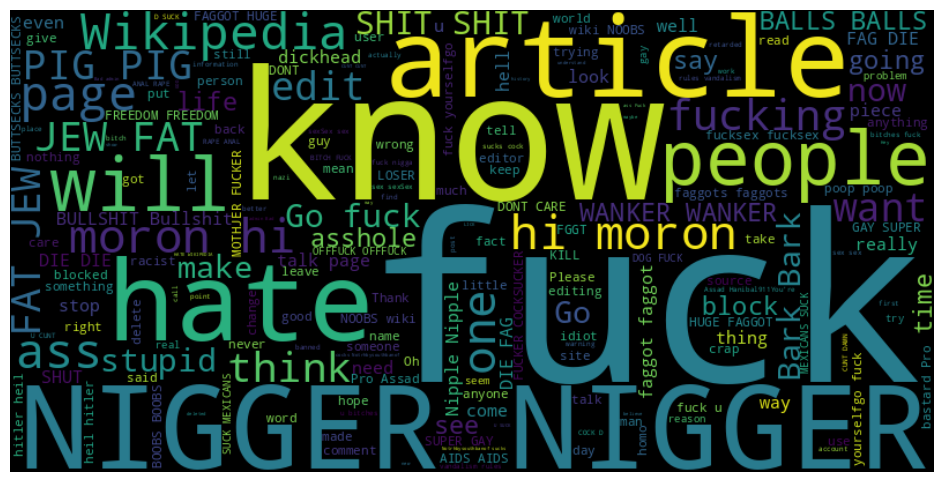

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["toxic"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-2816705484.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


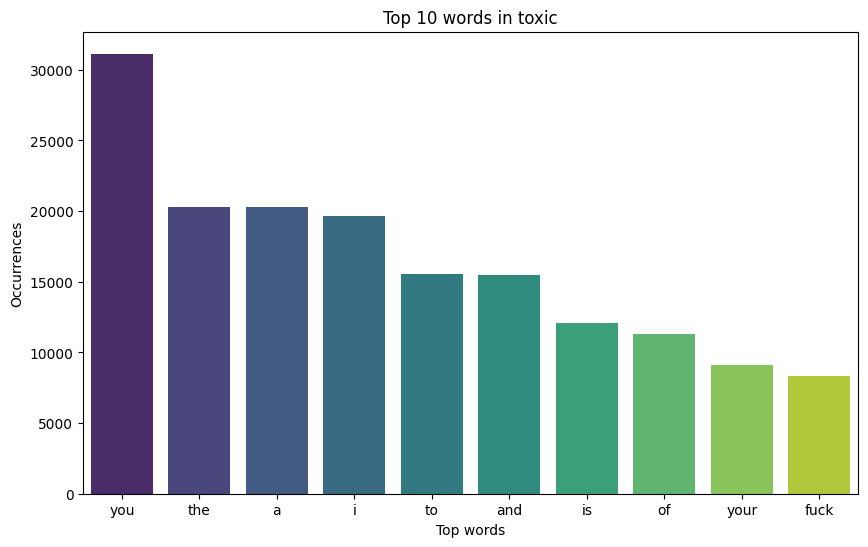

In [23]:
from collections import Counter


toxic_comments = train_df[train_df["toxic"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in toxic")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

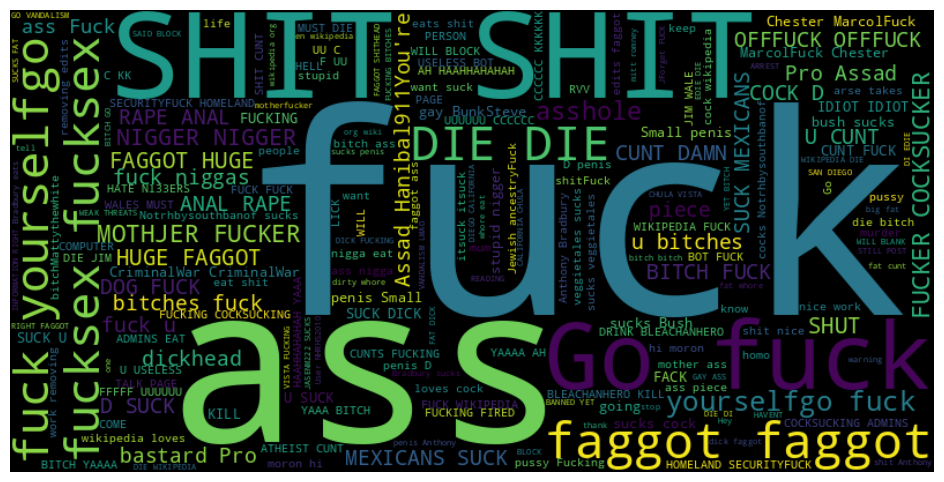

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["severe_toxic"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-944530146.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


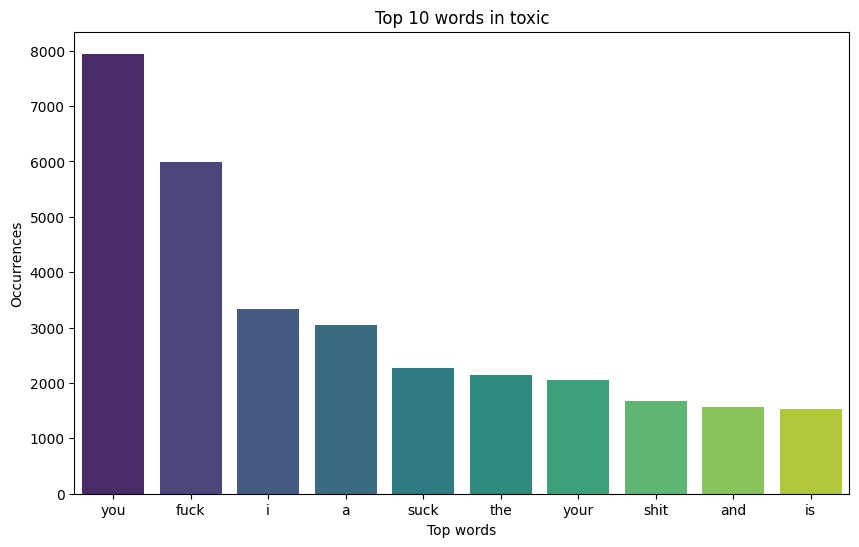

In [25]:
from collections import Counter


toxic_comments = train_df[train_df["severe_toxic"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in toxic")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

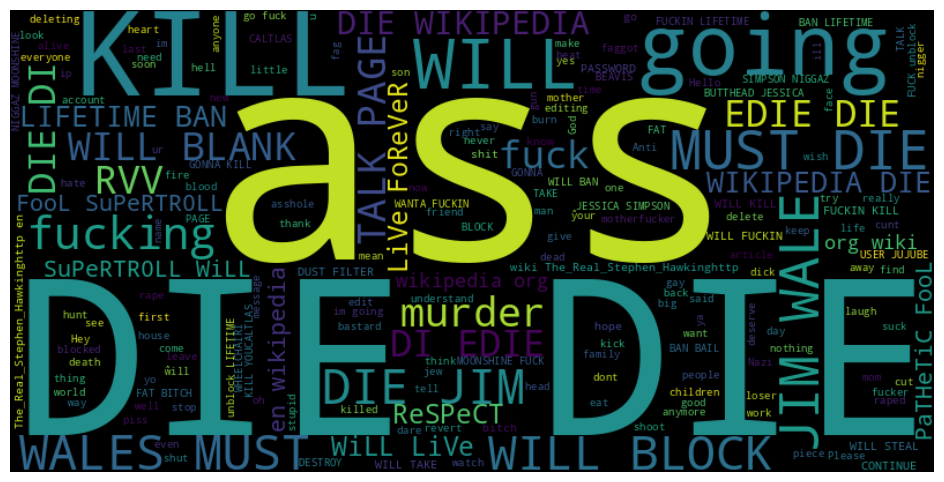

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["threat"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-1777475291.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


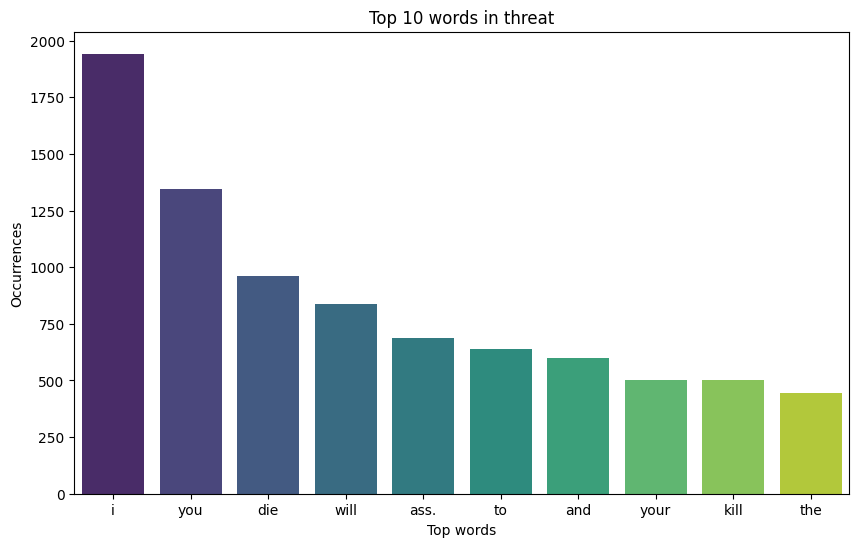

In [36]:
from collections import Counter


toxic_comments = train_df[train_df["threat"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in threat")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

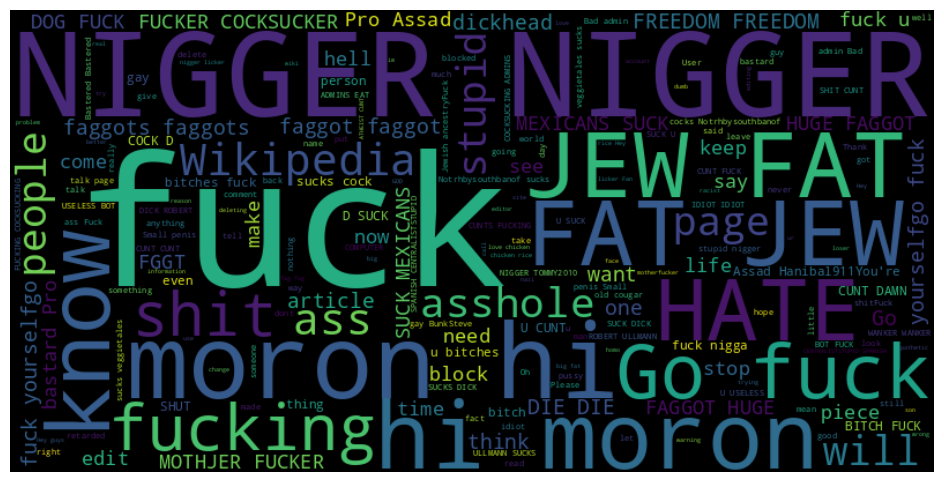

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["insult"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-1273855624.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


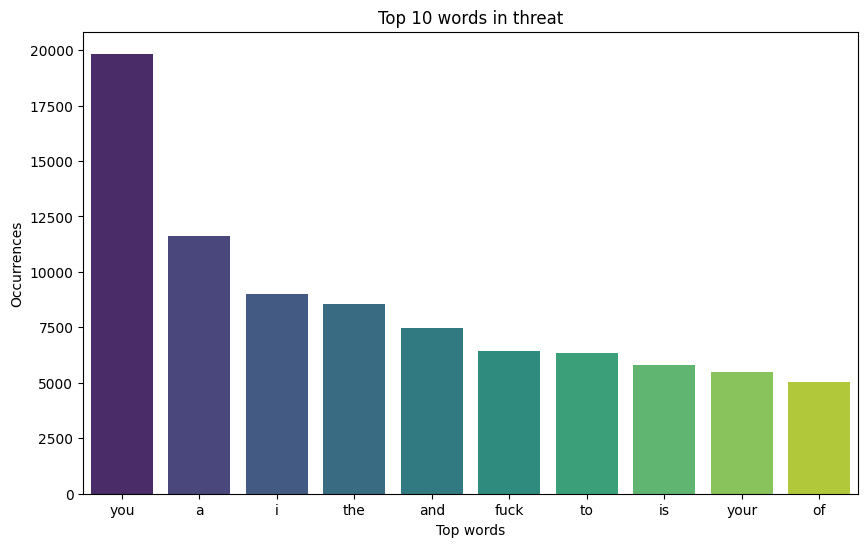

In [27]:
from collections import Counter


toxic_comments = train_df[train_df["insult"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in threat")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

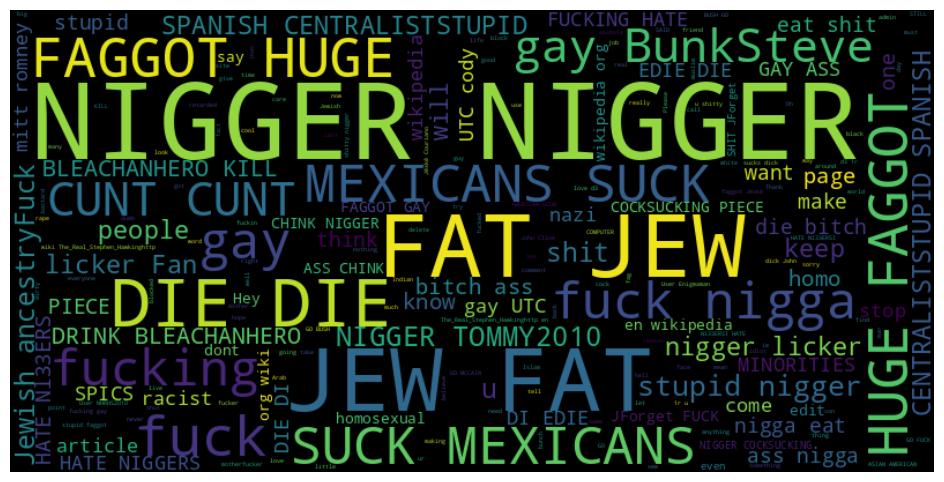

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["identity_hate"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-1882210679.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


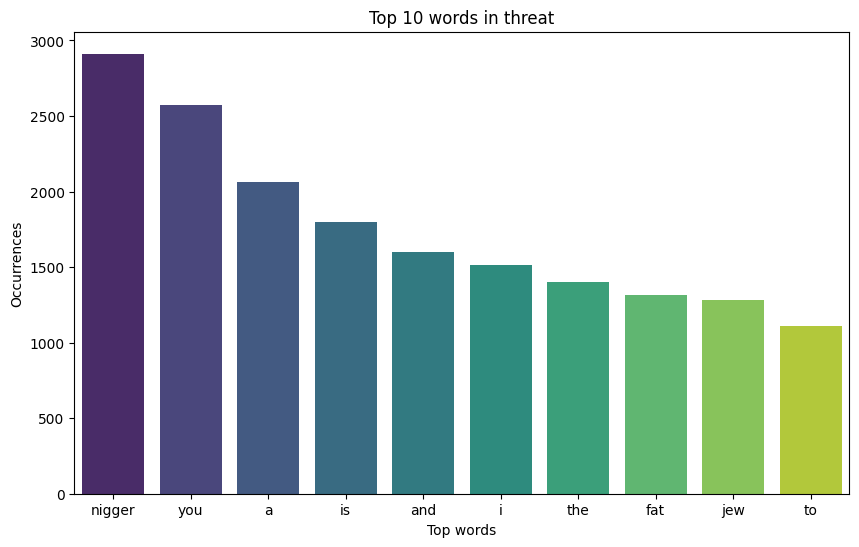

In [29]:
from collections import Counter


toxic_comments = train_df[train_df["identity_hate"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in threat")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

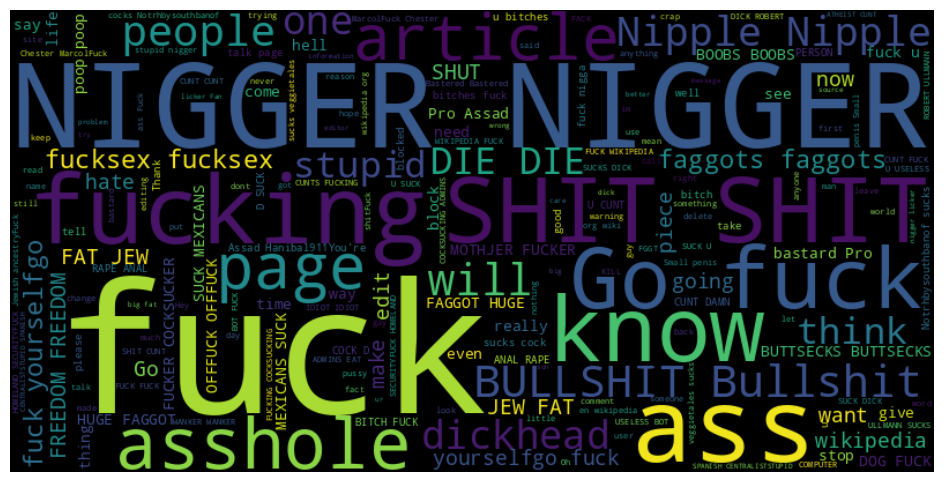

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in train_df[train_df["obscene"] == 1]["comment_text"])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',   # color theme
    max_words=200,
    contour_color='white',
    contour_width=1
).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/tmp/ipython-input-3269555925.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


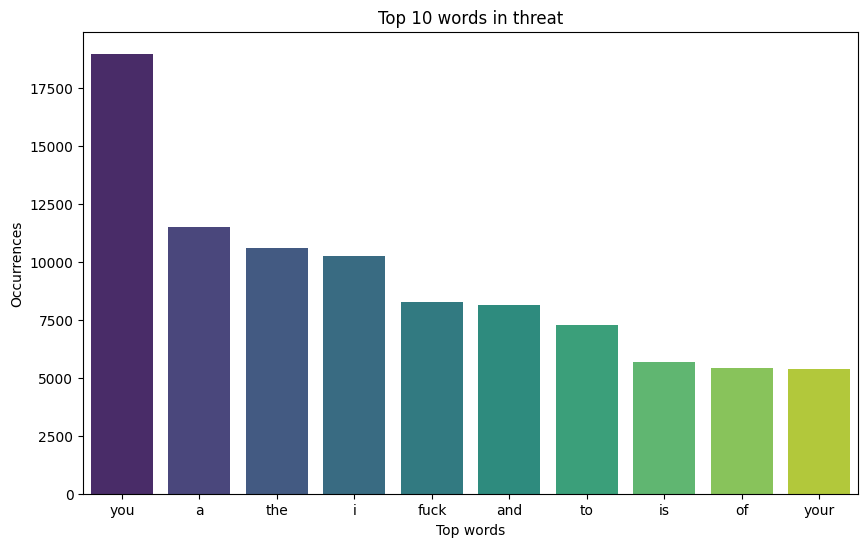

In [31]:
from collections import Counter


toxic_comments = train_df[train_df["obscene"] == 1]["comment_text"]

# Tokenize (basic split, you can use nltk or spacy for better tokenization)
words = " ".join(toxic_comments).lower().split()

# Count word frequencies
word_counts = Counter(words)

# Get top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 10 words in threat")
plt.xlabel("Top words")
plt.ylabel("Occurrences")
plt.show()

In [29]:
train_df['comment_text']

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [ ]:
#X = train_df['comment_text'].values
#y = train_df(labels).values

In [38]:
!pip install --upgrade nltk

In [39]:
!rm -f nltk.py
!rm -rf nltk
!rm -rf __pycache__

#Text cleaning process

In [40]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [41]:
def expand_contractions(text):
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"cant", "can not", text)  # just in case "cant" without apostrophe
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"whats", "what is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"theres", "there is", text)
    return text

def clean_text(text):
    text = str(text).lower()
    text = expand_contractions(text)                  # <-- contractions first
    text = re.sub(r"http\S+|www\S+", "", text)        # remove urls
    text = re.sub(r"[^a-z\s]", "", text)              # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Lemmatization & stopword removal
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens)

#process the text

In [42]:
# Apply cleaning
train_df["clean_text"] = train_df["comment_text"].astype(str).apply(clean_text)
test_df["clean_text"] = test_df["comment_text"].astype(str).apply(clean_text)

In [43]:
print("\nSample Cleaned Comments:\n", train_df["clean_text"].head(10))


Sample Cleaned Comments:
 0    explanation why the edits made under my userna...
1    daww he matches this background colour i am se...
2    hey man i am really not trying to edit war its...
3    more i can not make any real suggestions on i ...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: clean_text, dtype: object


In [44]:
train_df["clean_text"]

,clean_text
0,explanation why the edits made under my userna...
1,daww he matches this background colour i am se...
2,hey man i am really not trying to edit war its...
3,more i can not make any real suggestions on i ...
4,you sir are my hero any chance you remember wh...
...,...
159566,and for the second ti ame of asking when your ...
159567,you should be ashamed of yourself that is a ho...
159568,spitzer umm there is no actual article for pro...
159569,and it looks like it was actually you who put ...


In [45]:
test_df['clean_text']

,clean_text
0,yo bitch ja rule is more succesful then you wi...
1,from rfc the title is fine as it is i amo
2,sources zawe ashton on lapland
3,if you have a look back at the source the info...
4,i do not anonymously edit articles at all
...,...
153159,i totally agree this stuff is nothing but tool...
153160,throw from out field to home plate does it get...
153161,okinotorishi ama categories i see your changes...
153162,one of the founding nations of the eu germany ...


In [46]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,number_of_labels,text_length,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww he matches this background colour i am se...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man i am really not trying to edit war its...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,more i can not make any real suggestions on i ...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,you sir are my hero any chance you remember wh...


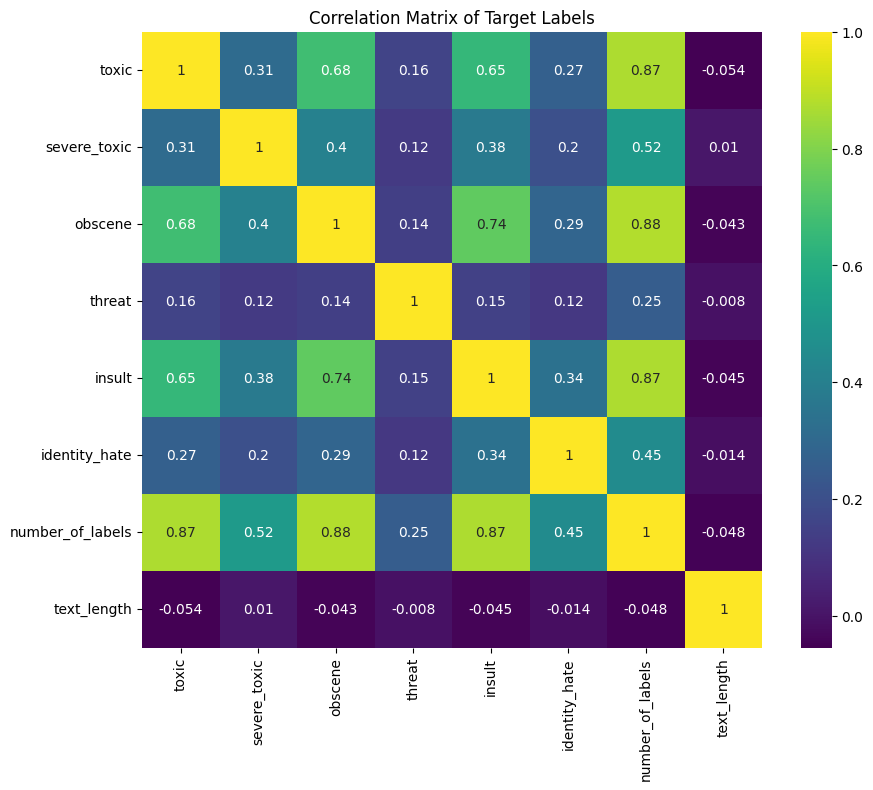

In [47]:
#co-relation
# Exclude non-numeric columns before calculating correlation
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.drop(['id', 'comment_text', 'clean_text'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Target Labels')
plt.show()

In [48]:
X = train_df['clean_text'].values
y = train_df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values
y = train_df[labels].values

In [49]:
X

array(['explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now',
       'daww he matches this background colour i am seemingly stuck with thanks talk january utc',
       'hey man i am really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info',
       ...,
       'spitzer umm there is no actual article for prostitution ring crunch captain',
       'and it looks like it was actually you who put on the speedy to have the first version deleted now that i look at it',
       'and i really do not think you understand i came here and my idea was bad right away what kind of community goes you have bad ideas go away instead of helping rewrite t

In [ ]:
#print(X[:5])

In [50]:
X.shape

(159571,)

In [51]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
#print(y[:5])

In [52]:
y.shape

(159571, 6)

#Tokenization + Padding

In [53]:
#Tokenization + Padding
max_words = 50000   # vocab size
max_len = 150       # max length of sequence

In [54]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df["clean_text"].values)

In [55]:
# Convert text → sequence of integers
X = tokenizer.texts_to_sequences(train_df["clean_text"].values)
X = pad_sequences(X, maxlen=max_len)

In [56]:
X_test = tokenizer.texts_to_sequences(test_df["clean_text"].values)
X_test = pad_sequences(X_test, maxlen=max_len)


In [57]:
# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print("\nX_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (127656, 150)
X_val shape: (31915, 150)
y_train shape: (127656, 6)
y_val shape: (31915, 6)
X_test shape: (153164, 150)


#Model Development:

##1. LSTM-based Model.

In [59]:
#1. LSTM-based Model.


In [60]:
from tensorflow.keras.callbacks import EarlyStopping

#Model Architecture
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(6, activation="sigmoid")   #toxicity categories
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

#Training

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 952s 945ms/step - accuracy: 0.8125 - loss: 0.1433 - val_accuracy: 0.9941 - val_loss: 0.0531
Epoch 2/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 983s 947ms/step - accuracy: 0.9864 - loss: 0.0499 - val_accuracy: 0.9941 - val_loss: 0.0495
Epoch 3/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 911s 913ms/step - accuracy: 0.9913 - loss: 0.0437 - val_accuracy: 0.9941 - val_loss: 0.0499
Epoch 4/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 939s 929ms/step - accuracy: 0.9794 - loss: 0.0398 - val_accuracy: 0.9941 - val_loss: 0.0522
Epoch 5/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 960s 907ms/step - accuracy: 0.9750 - loss: 0.0359 - val_accuracy: 0.9941 - val_loss: 0.0551


###LSTM model i got val_accuray 99.4% and train_accuracy 99%. which is an excellent result

In [61]:
model.save("lstm_model.h5")

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

y_pred  = model.predict(X_val)
print(accuracy_score(y_val,y_pred.round())) # Rounding predictions for metric calculation
#print(confusion_matrix(y_val,y_pred.round())) # Rounding predictions for metric calculation
#print(precision_score(y_val,y_pred.round(), average='micro')) # Added average='micro' for multi-label

998/998 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step
0.9194422685257716


In [45]:
print(y_val.shape, y_pred.shape)
print(y_val[:5])
print(y_pred[:5])

(31915, 6) (31915, 6)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[3.0333689e-01 1.0465308e-03 3.8324606e-02 5.0574560e-03 5.7093110e-02
  9.7533641e-03]
 [3.9904811e-03 3.2769055e-06 4.1570797e-04 3.5343313e-05 4.6228204e-04
  1.1970458e-04]
 [4.9130533e-02 7.7865610e-05 5.2364264e-03 5.7680038e-04 7.0144841e-03
  1.1394084e-03]
 [1.0821522e-03 5.2220611e-07 1.0246575e-04 7.3965507e-06 1.0038399e-04
  3.2497246e-05]
 [4.0763705e-03 2.7994513e-06 3.8864539e-04 3.1844771e-05 4.1771476e-04
  1.0534125e-04]]


In [46]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

print(multilabel_confusion_matrix(y_val, y_pred.round()))
print(classification_report(y_val, y_pred.round()))

[[[28556   303]
  [  849  2207]]

 [[31588     6]
  [  313     8]]

 [[29999   201]
  [  484  1231]]

 [[31841     0]
  [   74     0]]

 [[29980   321]
  [  650   964]]

 [[31621     0]
  [  294     0]]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3056
           1       0.57      0.02      0.05       321
           2       0.86      0.72      0.78      1715
           3       0.00      0.00      0.00        74
           4       0.75      0.60      0.67      1614
           5       0.00      0.00      0.00       294

   micro avg       0.84      0.62      0.72      7074
   macro avg       0.51      0.34      0.38      7074
weighted avg       0.79      0.62      0.69      7074
 samples avg       0.06      0.06      0.06      7074



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

##2.CNN-based Model
####CNNs are fast and capture n-gram features well.

In [41]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Training
history = model_cnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_val, y_val),   # 👈 this ensures val_loss & val_accuracy are tracked
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 274s 270ms/step - accuracy: 0.6373 - loss: 0.1355 - val_accuracy: 0.9941 - val_loss: 0.0504
Epoch 2/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 319s 267ms/step - accuracy: 0.9672 - loss: 0.0469 - val_accuracy: 0.9941 - val_loss: 0.0487
Epoch 3/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 262s 262ms/step - accuracy: 0.9603 - loss: 0.0381 - val_accuracy: 0.9939 - val_loss: 0.0517
Epoch 4/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 260s 261ms/step - accuracy: 0.8708 - loss: 0.0302 - val_accuracy: 0.9787 - val_loss: 0.0556
Epoch 5/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 259s 259ms/step - accuracy: 0.7681 - loss: 0.0244 - val_accuracy: 0.9085 - val_loss: 0.0634


#In cnn model i got val accuracy is 99.4% and train accuracy is 96.7%. Which is a good result and perfrms well

In [43]:
model_cnn.save("cnn_toxic1_model.h5")

In [44]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [46]:
from sklearn.metrics import accuracy_score

y_pred1  = model_cnn.predict(X_val)
print(accuracy_score(y_val,y_pred1.round()))
#print(confusion_matrix(y_val,y_pred1))
#print(precision_score(y_val,y_pred1))

998/998 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step
0.9161836127212909


In [58]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

print(multilabel_confusion_matrix(y_val, y_pred1.round()))
print(classification_report(y_val, y_pred1.round()))

[[[28479   380]
  [  866  2190]]

 [[31527    67]
  [  238    83]]

 [[29904   296]
  [  344  1371]]

 [[31841     0]
  [   74     0]]

 [[29938   363]
  [  534  1080]]

 [[31621     0]
  [  294     0]]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      3056
           1       0.55      0.26      0.35       321
           2       0.82      0.80      0.81      1715
           3       0.00      0.00      0.00        74
           4       0.75      0.67      0.71      1614
           5       0.00      0.00      0.00       294

   micro avg       0.81      0.67      0.73      7074
   macro avg       0.50      0.41      0.44      7074
weighted avg       0.76      0.67      0.71      7074
 samples avg       0.06      0.06      0.06      7074



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

##3. CNN usinhg pytorch

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create DataLoaders
batch_size = 128  # Assuming you used 128 in the Keras model
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, max_len):
        super(CNNTextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(embed_dim, 128, kernel_size=5)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)             # (batch, seq_len, embed_dim)
        x = x.permute(0, 2, 1)           # (batch, embed_dim, seq_len)
        x = torch.relu(self.conv1(x))    # (batch, 128, seq_len-4)
        x = self.pool(x).squeeze(-1)     # (batch, 128)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

# Model
modelcnn1 = CNNTextClassifier(vocab_size=max_words, embed_dim=128, num_classes=y_train.shape[1], max_len=max_len)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(modelcnn1.parameters(), lr=1e-3)

# Training loop
for epoch in range(5):
    modelcnn1.train()
    total_loss, total_acc = 0, 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = modelcnn1(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.round(torch.sigmoid(outputs))
        acc = (preds == y_batch).float().mean()
        total_acc += acc.item()

    # Validation
    modelcnn1.eval()
    val_loss, val_acc = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = modelcnn1(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            acc = (preds == y_batch).float().mean()
            val_acc += acc.item()

    print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}, "
          f"Train Acc: {total_acc/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Acc: {val_acc/len(val_loader):.4f}")

Epoch 1, Train Loss: 0.0902, Train Acc: 0.9730, Val Loss: 0.0626, Val Acc: 0.9789
Epoch 2, Train Loss: 0.0547, Train Acc: 0.9808, Val Loss: 0.0572, Val Acc: 0.9805
Epoch 3, Train Loss: 0.0443, Train Acc: 0.9831, Val Loss: 0.0567, Val Acc: 0.9803
Epoch 4, Train Loss: 0.0372, Train Acc: 0.9852, Val Loss: 0.0610, Val Acc: 0.9805
Epoch 5, Train Loss: 0.0313, Train Acc: 0.9871, Val Loss: 0.0643, Val Acc: 0.9792


In [61]:
torch.save(modelcnn1.state_dict(), "cnn1_pytorch1.pth")

##Cnn pytorch model i got val accuracy 98% and train accuracy is 98.5%. both val and train its performnce is excellent.

In [ ]:
model1 = modelcnn1()   # your CNN class
# then load weights
model1.load_state_dict(torch.load("cnn1_pytorch1.pth"))
model1.eval()

In [63]:
# Convert X_val to a PyTorch tensor if it's not already
X_val_tensor = torch.tensor(X_val, dtype=torch.long)

# Set the model to evaluation mode
modelcnn1.eval()

# Get predictions
with torch.no_grad():
    y_pred_logits = modelcnn1(X_val_tensor)
    y_pred2 = torch.sigmoid(y_pred_logits).round() # Apply sigmoid and round for binary predictions

# Convert predictions to numpy for accuracy_score
y_pred2_np = y_pred2.numpy()

print(accuracy_score(y_val,y_pred2_np))

0.9048723170922763


In [64]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

print(multilabel_confusion_matrix(y_val, y_pred2.round()))
print(classification_report(y_val, y_pred2.round()))

[[[27941   918]
  [  715  2341]]

 [[31556    38]
  [  270    51]]

 [[29851   349]
  [  398  1317]]

 [[31834     7]
  [   62    12]]

 [[29817   484]
  [  466  1148]]

 [[31615     6]
  [  277    17]]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      3056
           1       0.57      0.16      0.25       321
           2       0.79      0.77      0.78      1715
           3       0.63      0.16      0.26        74
           4       0.70      0.71      0.71      1614
           5       0.74      0.06      0.11       294

   micro avg       0.73      0.69      0.71      7074
   macro avg       0.69      0.44      0.47      7074
weighted avg       0.73      0.69      0.69      7074
 samples avg       0.07      0.06      0.06      7074



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

def plot_multilabel_confusion(y_true, y_pred, class_names=None):
    # Round predictions
    y_pred = (y_pred > 0.5).astype(int)

    # Compute confusion matrices
    cms = multilabel_confusion_matrix(y_true, y_pred)

    n_labels = cms.shape[0]
    cols = 3
    rows = (n_labels + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()

    for i, cm in enumerate(cms):
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
        axes[i].set_title(f"Label: {class_names[i] if class_names else i}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

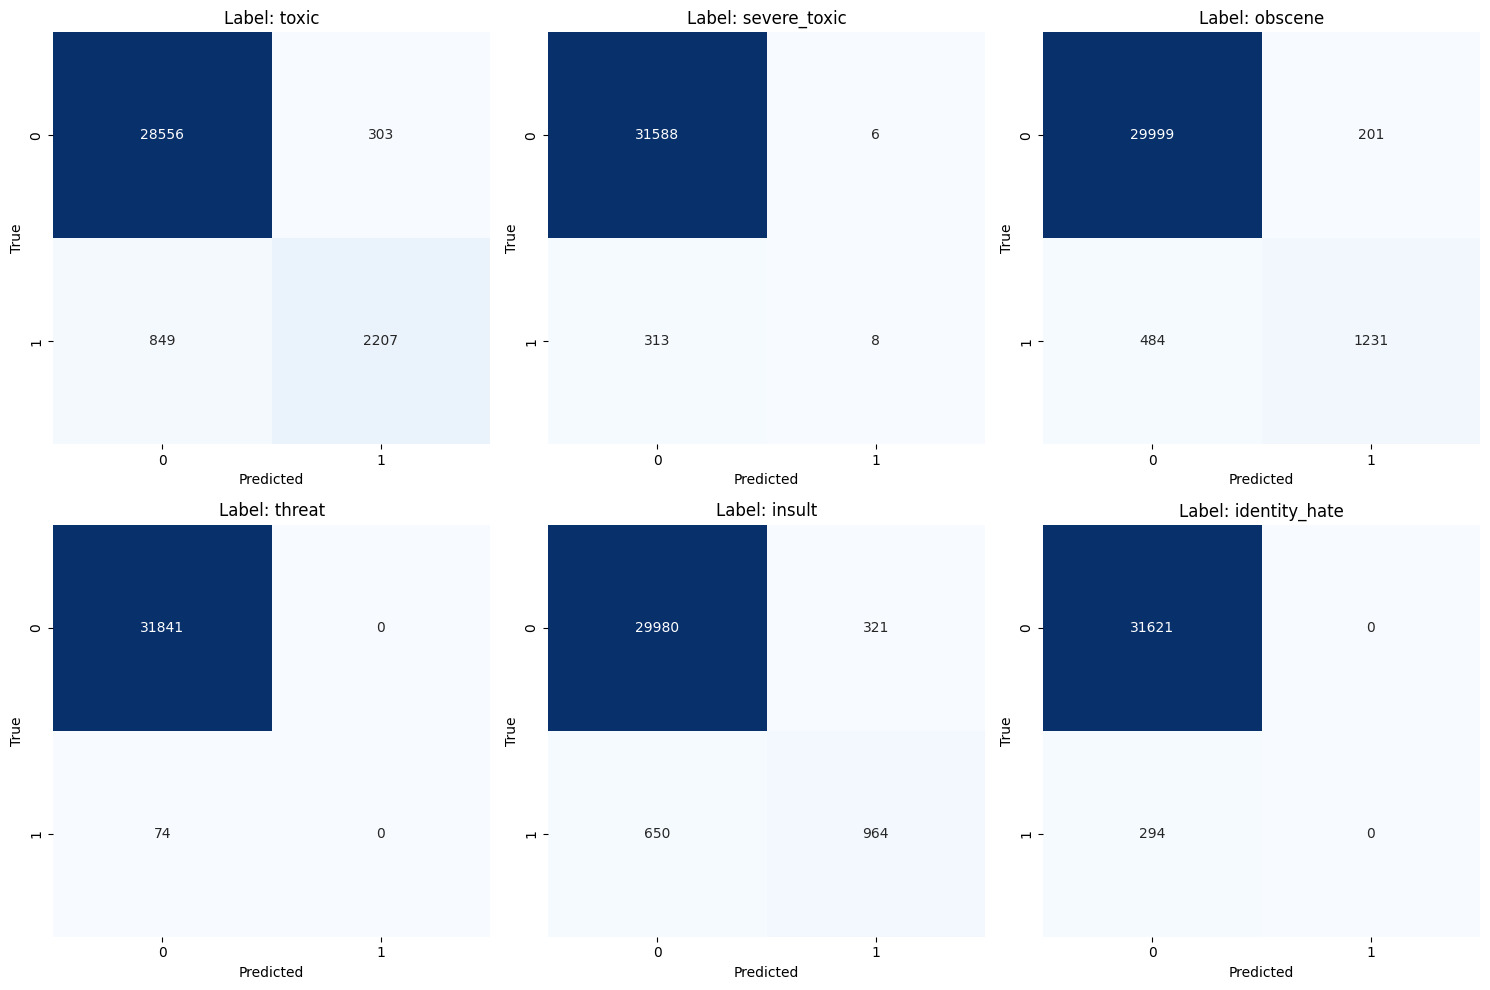

In [72]:
#LSTM model
plot_multilabel_confusion(y_val, y_pred, class_names=["toxic","severe_toxic","obscene","threat","insult","identity_hate"])

      Predicted 0   Predicted 1
True  0  -  TN       -   FP

True  1  -    FN      -   TP

1. toxic

TN = 28,556 (correctly predicted non-toxic)

FP = 303 (false alarms)

FN = 849 (missed toxic comments)

TP = 2,207 (correctly predicted toxic)

The model catches a good number of toxic comments but misses quite a few (849 false negatives).

2. severe_toxic

TN = 31,588

FP = 6

FN = 313

TP = 8

Huge imbalance: very few positives. The model predicts almost everything as non-severe, so recall is very low (only 8 true positives out of 321 actual positives).

3. obscene

TN = 29,999

FP = 201

FN = 484

TP = 1,231

Decent detection: some misses, but many obscene comments are caught.

4. threat

TN = 31,841

FP = 0

FN = 74

TP = 0

Model never predicts “threat”. It completely fails on this class. This usually happens because the class is very rare in the dataset (class imbalance).

5. insult

TN = 29,980

FP = 321

FN = 650

TP = 964

Reasonable detection of insults, though it misses ~40% of them.

6. identity_hate

TN = 31,621

FP = 0

FN = 294

TP = 0

Similar to threat: model never predicts identity hate. Severe imbalance problem again.

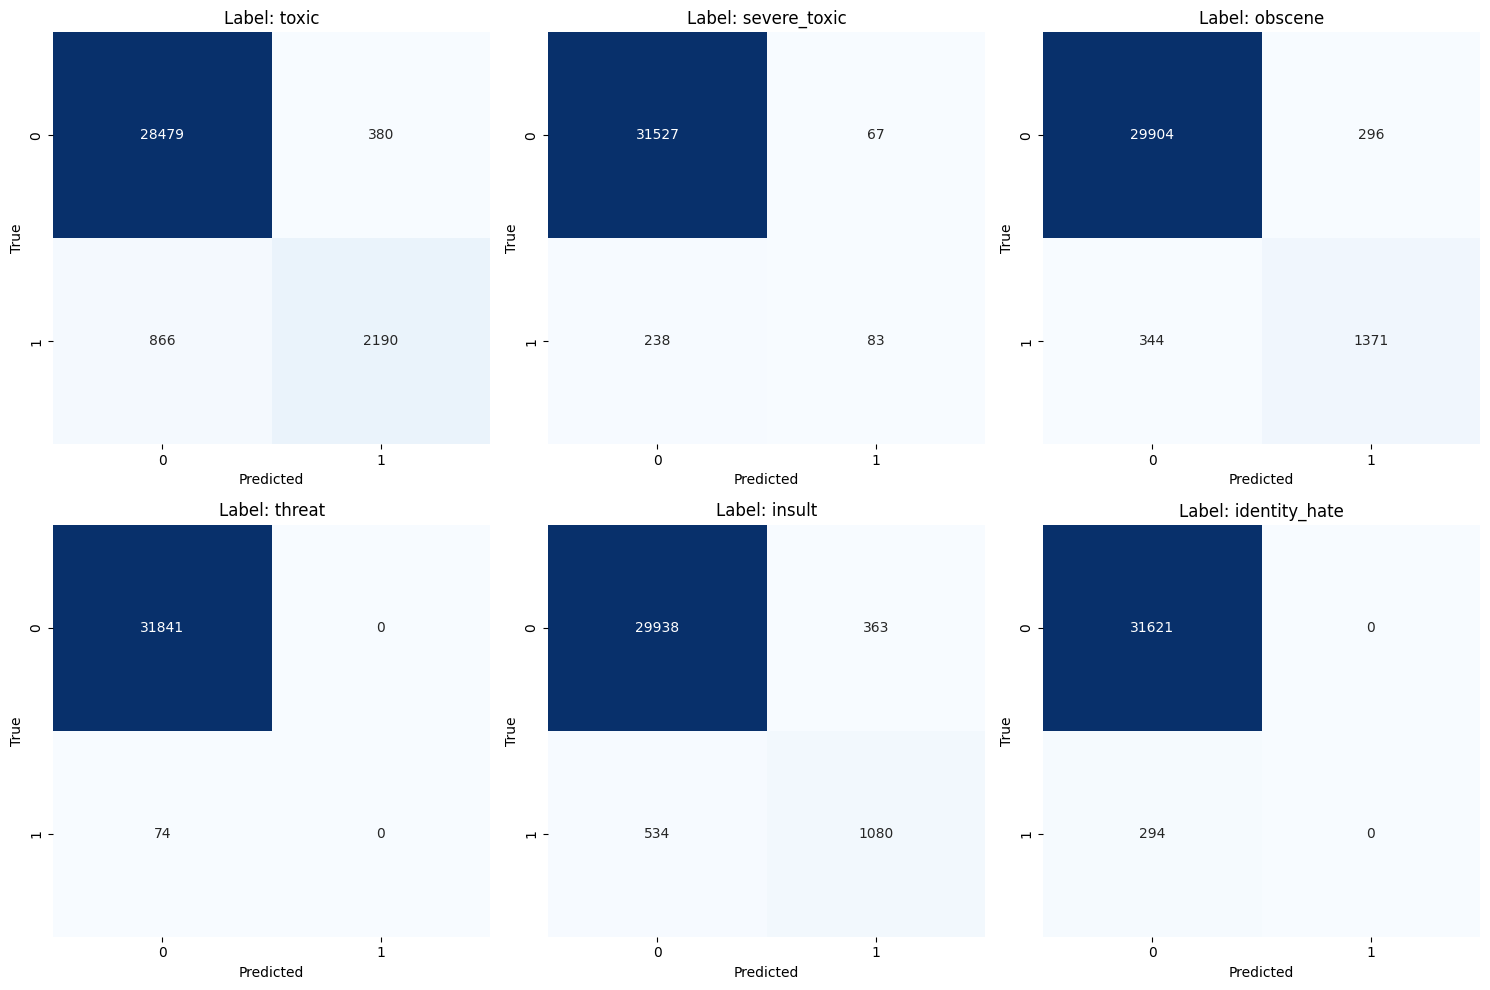

In [73]:
#CNN Tensorflow
plot_multilabel_confusion(y_val, y_pred1, class_names=["toxic","severe_toxic","obscene","threat","insult","identity_hate"])

1. toxic

TN = 28,479, FP = 380

FN = 866, TP = 2,190

✅ Good performance:

Many toxic comments correctly detected (2,190 TPs).

Some false negatives (866) → model misses some toxic comments.

2. severe_toxic

TN = 31,527, FP = 67

FN = 238, TP = 83

Imbalanced class:

Only a few severe_toxic comments exist.

Model catches 83, but misses 238 → recall is low.

Precision is okay since false positives are few (67).

3. obscene

TN = 29,904, FP = 296

FN = 344, TP = 1,371

✅ Stronger detection:

Model correctly detects many obscene cases (1,371 TPs).

Few misses (344 FNs).

Balanced precision and recall.

4. threat

TN = 31,841, FP = 0

FN = 74, TP = 0
Model never predicts “threat” (TP = 0).

All actual threats are missed (74 FNs).

Reason → class imbalance

5. insult

TN = 29,938, FP = 363

FN = 534, TP = 1,080

✅ Moderate detection:

Model detects insults reasonably well (1,080 TPs).

Misses some (534 FNs).

Some false positives (363).

6. identity_hate

TN = 31,621, FP = 0

FN = 294, TP = 0
Model never predicts “identity_hate” (similar to “threat”).

All identity hate cases are missed.

Again → due to class imbalance.

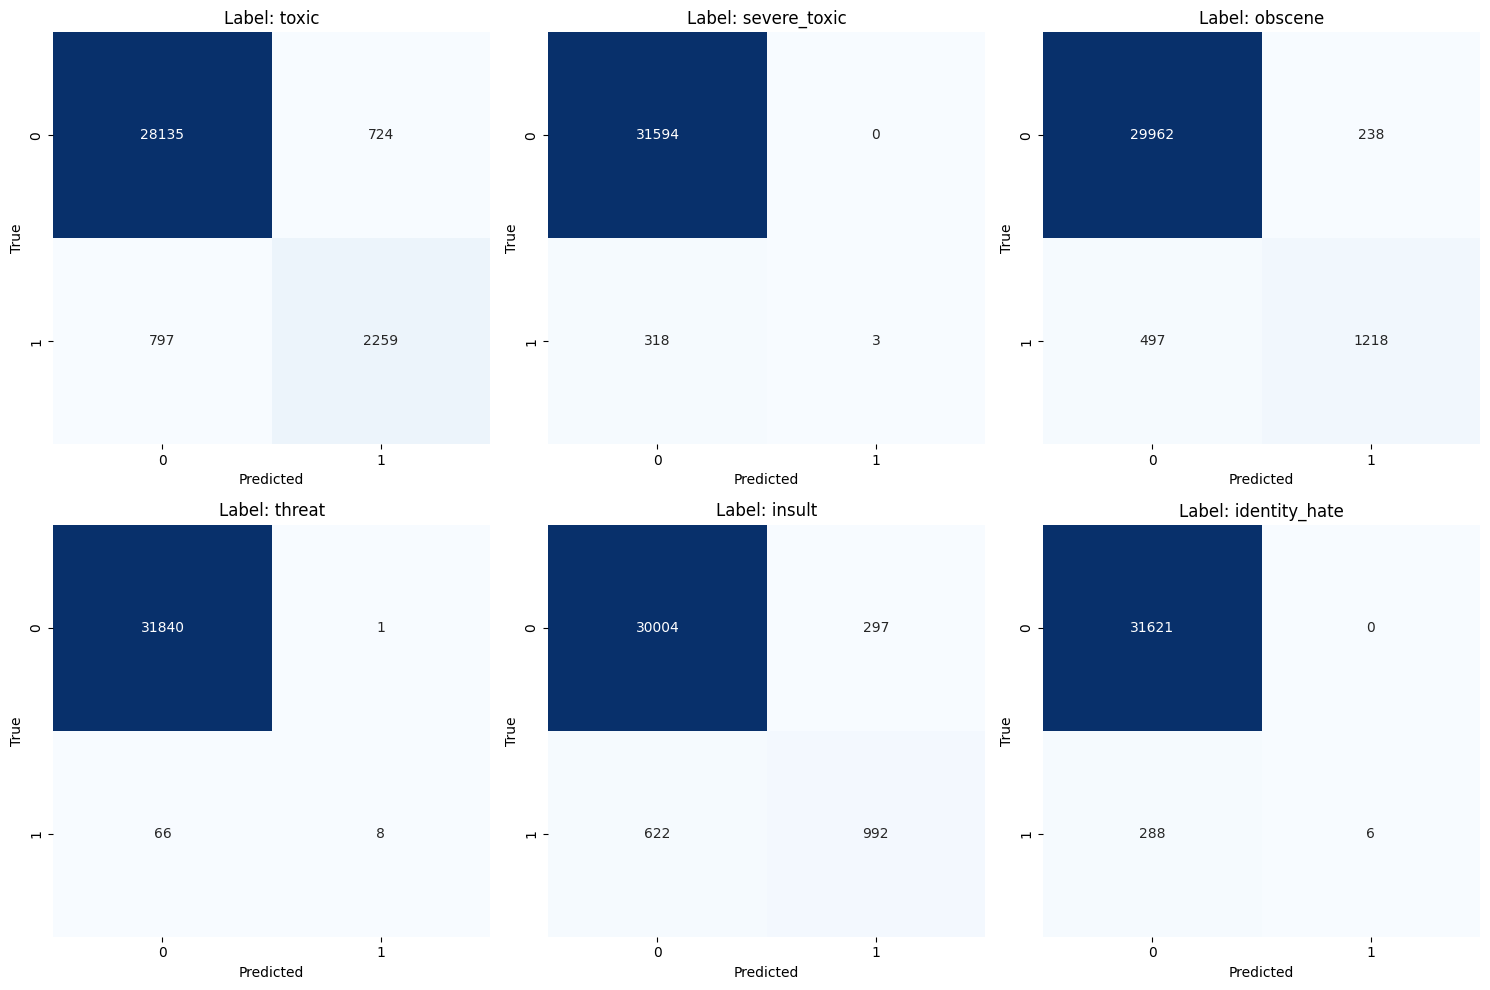

In [71]:
#PyTorch CNN
modelcnn1.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = modelcnn1(X_batch)
        all_preds.append(outputs.cpu().numpy())
        all_labels.append(y_batch.cpu().numpy())

y_pred2 = np.vstack(all_preds)
y_true = np.vstack(all_labels)

plot_multilabel_confusion(y_true, y_pred2, class_names=["toxic","severe_toxic","obscene","threat","insult","identity_hate"])


toxic

TN = 28,135, TP = 2,259 → good detection.

Some FNs (797) → model missed some toxic comments.

Some FPs (724) → some non-toxic flagged as toxic.

severe_toxic

Very few TPs (3 only).

FN = 318 → the model almost always predicts non-severe.

Severe class is rare → model struggles.

obscene

TN = 29,962, TP = 1,218.

FN = 497 → missed some obscene ones.

FP = 238 → some false alarms.

threat

TN = 31,840, TP = 8 only.

FN = 66 → most threats are missed.

Like severe_toxic, it’s under-predicted because it’s rare.

insult

TN = 30,004, TP = 992.

FN = 622 → missed insults.

FP = 297 → some false alarms.

identity_hate

TN = 31,621, TP = 6.

FN = 288 → almost always missed.

Like threat and severe_toxic, very imbalanced.

4. Key insights

Model works best on toxic and obscene, since these classes have more training samples.

Model struggles on rare classes (threat, identity_hate, severe_toxic), barely predicting positives.

This is a common issue in imbalanced multi-label classification.

In [58]:
#model_CNN tensorflow
from sklearn.metrics import roc_auc_score
import numpy as np

# y_true: true binary matrix (num_samples x num_classes)
# y_pred: predicted probabilities from model (num_samples x num_classes)

y_pred = model_cnn.predict(X_val)

# Compute ROC-AUC for each class
for i, label in enumerate(labels):
    auc = roc_auc_score(y_val[:, i], y_pred[:, i])
    print(f"{label}: ROC-AUC = {auc:.4f}")

# Macro average (treat all classes equally)
macro_auc = roc_auc_score(y_val, y_pred, average="macro")
print(f"Macro ROC-AUC: {macro_auc:.4f}")

# Micro average (weight classes by sample counts)
micro_auc = roc_auc_score(y_val, y_pred, average="micro")
print(f"Micro ROC-AUC: {micro_auc:.4f}")

998/998 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step
toxic: ROC-AUC = 0.9739
severe_toxic: ROC-AUC = 0.9874
obscene: ROC-AUC = 0.9894
threat: ROC-AUC = 0.9758
insult: ROC-AUC = 0.9817
identity_hate: ROC-AUC = 0.9606
Macro ROC-AUC: 0.9781
Micro ROC-AUC: 0.9857


In [62]:
#model_lstm
from sklearn.metrics import roc_auc_score
import numpy as np

# y_true: true binary matrix (num_samples x num_classes)
# y_pred: predicted probabilities from model (num_samples x num_classes)

y_pred = model.predict(X_val)

# Compute ROC-AUC for each class
for i, label in enumerate(labels):
    auc = roc_auc_score(y_val[:, i], y_pred[:, i])
    print(f"{label}: ROC-AUC = {auc:.4f}")

# Macro average (treat all classes equally)
macro_auc = roc_auc_score(y_val, y_pred, average="macro")
print(f"Macro ROC-AUC: {macro_auc:.4f}")

# Micro average (weight classes by sample counts)
micro_auc = roc_auc_score(y_val, y_pred, average="micro")
print(f"Micro ROC-AUC: {micro_auc:.4f}")

998/998 ━━━━━━━━━━━━━━━━━━━━ 68s 67ms/step
toxic: ROC-AUC = 0.9739
severe_toxic: ROC-AUC = 0.9871
obscene: ROC-AUC = 0.9883
threat: ROC-AUC = 0.9549
insult: ROC-AUC = 0.9816
identity_hate: ROC-AUC = 0.9515
Macro ROC-AUC: 0.9729
Micro ROC-AUC: 0.9845


# Here i choose CNN tensorflow for my future predictions. Here i got 99.4% val_accuracy for that. LSTM also has 99.4% val_accuracy. CNN tensorflow perform better.Its ROC_AUC score is better than others.

#Cnn pytorch also performs well and val_accuracy is 98% . But the prediction wise i select CNN tensorflow

#Future Work

While the CNN TensorFlow model demonstrates promising results for toxic comment detection, several improvements can be explored in future work. First, incorporating pre-trained transformer-based models like BERT or DistilBERT could further enhance accuracy and contextual understanding of comments. Second, expanding the dataset with multilingual and domain-specific toxic comments would make the model more robust and applicable across different platforms. Third, integrating explainable AI techniques could help moderators understand why a comment is flagged, improving trust and transparency. Finally, deploying the model as a real-time API or browser extension can make it directly usable in online platforms, ensuring timely intervention against toxic behavior.

In [64]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.2 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile comments_toxicity1.py
import streamlit as st
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.sequence import pad_sequences

# Define labels
LABELS = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

@st.cache_resource
def load_model_and_tokenizer():
    model = tf.keras.models.load_model("cnn_toxic1_model.h5")
    with open("tokenizer.pkl", "rb") as f:
        tokenizer = pickle.load(f)
    return model, tokenizer

model, tokenizer = load_model_and_tokenizer()
MAX_LEN = 100

def predict_text(text, threshold=0.5):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding="post")
    probs = model.predict(padded)[0]  # one prob per label
    results = {LABELS[i]: (probs[i], int(probs[i] >= threshold)) for i in range(len(LABELS))}
    return results

st.title("🛡️ CNN Multi-Label Toxicity Classifier")

choice = st.sidebar.radio("Navigate", ["Real-time Prediction", "Bulk Prediction"])

if choice == "Real-time Prediction":
    st.header("Enter a comment")
    user_text = st.text_area("Type a comment here...")
    threshold = st.slider("Threshold", 0.0, 1.0, 0.5, 0.05)

    if st.button("Predict"):
        if user_text.strip():
            results = predict_text(user_text, threshold)
            st.subheader("Prediction Results")
            for label, (prob, flag) in results.items():
                if flag:
                    st.error(f"{label}: {prob:.2f}")
                else:
                    st.success(f"{label}: {prob:.2f}")

elif choice == "Bulk Prediction":
    st.header("Upload CSV for Bulk Predictions")
    st.write("CSV must have a column named `text`.")

    file = st.file_uploader("Upload your CSV", type=["csv"])
    if file:
        df = pd.read_csv(file)
        if "text" not in df.columns:
            st.error("CSV must contain a `text` column.")
        else:
            st.write("Preview:")
            st.dataframe(df.head())

            if st.button("Run Predictions"):
                all_probs = []
                for txt in df["text"].astype(str):
                    results = predict_text(txt)
                    all_probs.append({lbl: results[lbl][0] for lbl in LABELS})

                probs_df = pd.DataFrame(all_probs)
                final_df = pd.concat([df, probs_df], axis=1)

                st.success("Predictions complete!")
                st.dataframe(final_df)

                csv = final_df.to_csv(index=False).encode("utf-8")
                st.download_button("Download Results", csv, "predictions.csv", "text/csv")
            #else:
                #st.write("prediction complete")

Overwriting app.py


In [ ]:
!streamlit run /content/comments_toxicity1.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.138.192.19
⠙⠹⠸⠼⠴your url is: https://gentle-moments-lead.loca.lt


Now you can run the cells to plot the distributions of the number of characters and words.